In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
# Load dataset
file_path = "DataCoSupplyChainDataset.csv"
df = pd.read_csv(file_path, encoding='latin1')

In [ ]:
# Drop irrelevant columns
drop_cols = ['Customer Email', 'Customer Fname', 'Customer Lname', 'Customer Password',
             'Product Description', 'Product Image', 'Order Zipcode']
df = df.drop(columns=drop_cols)

# Convert date columns to datetime
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'])
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'])

# Create new features
df['shipping_days_taken'] = (df['shipping date (DateOrders)'] - df['order date (DateOrders)']).dt.days
df['shipping_delay'] = df['shipping_days_taken'] - df['Days for shipment (scheduled)']

# Drop original date columns
df = df.drop(columns=['order date (DateOrders)', 'shipping date (DateOrders)'])

# Handle missing values
df = df.dropna()

X = X.drop(columns=['shipping_days_taken', 'Days for shipment (scheduled)'])



In [11]:
# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df.drop(columns=['shipping_delay'])
y = df['shipping_delay']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [12]:
print(y.describe())
print(y.unique())




count    180516.000000
mean          0.540013
std           1.491892
min          -2.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           4.000000
Name: shipping_delay, dtype: float64
[-1  1  0 -2  2  4  3]


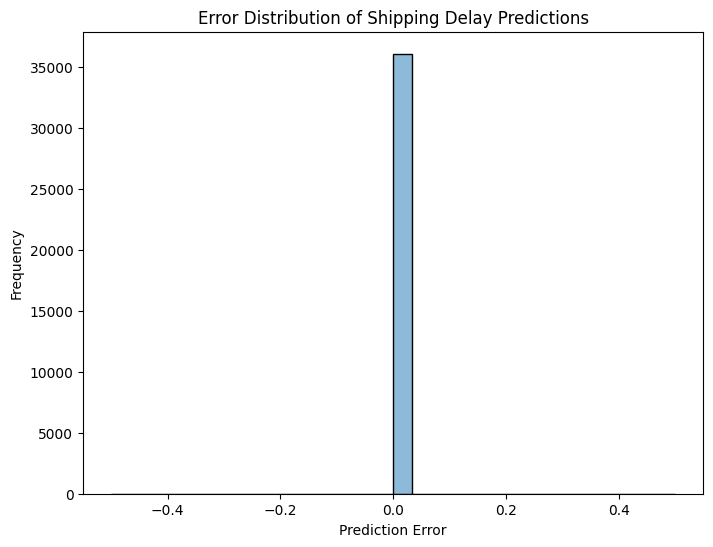

MAE: 0.00, RMSE: 0.00


In [ ]:
# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Visualization
plt.figure(figsize=(8,6))
sns.histplot(y_test - y_pred, bins=30, kde=True)
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution of Shipping Delay Predictions")
plt.show()

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}")



In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    results[name] = {"MAE": mae, "RMSE": rmse}

# Results DataFrame
results_df = pd.DataFrame(results).T

# Barplot of MAE and RMSE
results_df.plot(kind='bar', figsize=(10,6))
plt.title("Model Comparison")
plt.ylabel("Error")
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'RandomForestRegressor' is not defined

In [1]:
importances = models["Random Forest"].feature_importances_
feature_names = X.columns

imp_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
imp_df = imp_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x="Importance", y="Feature", data=imp_df.head(15))
plt.title("Top 15 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()


NameError: name 'models' is not defined

In [ ]:
best_model = models["Gradient Boosting"]
residuals = y_test - best_model.predict(X_test)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=best_model.predict(X_test), y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residuals Plot - Gradient Boosting")
plt.show()
